In [1]:
from keras.datasets import mnist
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

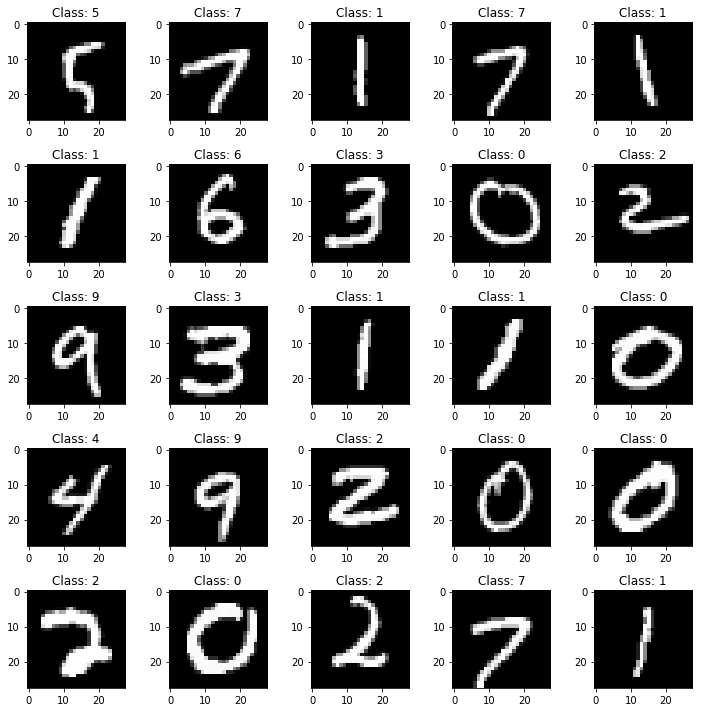

In [3]:
offset=100
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx+offset], cmap='gray')
    plt.title(f'Class: {y_train[idx+offset]}')
plt.tight_layout()

In [4]:
img_rows, img_cols = X_train.shape[1:3]
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
if np.max(X_train) > 1 : X_train = X_train / 255
if np.max(X_test) > 1 : X_test = X_test / 255

In [6]:
if len(y_train.shape) == 1:
    nc = len(set(y_train))
    y_train2 = to_categorical(y_train, nc)
    y_test2 = to_categorical(y_test, nc)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(nc, activation='softmax')

])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


## Trenowanie

In [8]:
model.fit(
    X_train, y_train2,
    batch_size=256,
    epochs=5,
    validation_data=(X_test, y_test2)
)


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 602us/step - loss: 0.2132 - acc: 0.9385 - val_loss: 0.0627 - val_acc: 0.9814
Epoch 2/5
60000/60000 [==============================] - 37s 625us/step - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0424 - val_acc: 0.9858
Epoch 3/5
60000/60000 [==============================] - 35s 587us/step - loss: 0.0347 - acc: 0.9889 - val_loss: 0.0353 - val_acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 39s 657us/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0356 - val_acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 36s 602us/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.0371 - val_acc: 0.9893


## Testowanie

In [9]:
score = model.evaluate(X_test, y_test2, verbose=0)
score

[0.037116460172447845, 0.9893]